# GSL Uruguay - January 2020

# Week - 3 | Lesson - 2

-----

# Computer Vision and Applications to Health Care - Dog/Cats Classification


## Goals:

1. In this lesson, we will continue learning how to process images using Python libraries.

2. We will use deep learning models to solve the computer vision problem of **image classification**.  

3. We will investigate the performance of **Fully Connected Neural Networks (FCNNs)** and **Convolutional Neural Networks (CNNs)** as compared to the other image classification methods we investigated in the previous notebook.

## Methods:

1. Fully Connected Neural Networks (FCNNs)

2. Convolutional Neural Networks (CNNs)

3. Data Augmentation techniques

4. Regularization of Neural Networks through Dropout

---

# Covered up to now:

1. Images as data
2. Basic image maniuplation - rotation, flipping, mirroing
3. Images as an array of numbers
4. Logistic regression for image classification
5. Multi-class prediction
6. Introduction to Fully Connected Neural Networks

---

# Dogs vs. Cats - Image Classification

### Source: https://www.kaggle.com/c/dogs-vs-cats

### Overview:
1. We will build a model using deep neural networks to classify whether an image contain a dog or a cat
2. We use data provided by the Kaggle competition
3. The original dataset contains 25,000 images of dogs and cats
4. We will use a subset of it: 4,000 images for training, 2,000 for validation and 2,000 for test per category

---

# Convolutional Neural Nets in Keras

1. Our primary focus is to learn how to work with images, train and test CNNs, and go deeper with Keras
2. To maintain the focus on these objectives, we use a relatively simpler dataset and problem
3. We will use more challenging problems for the practice session and for the project 
4. Also, it doesn't hurt to look at fluffy puppies and adorable cats!

---

# 0. Import modules

#### Python Package Installations

In [3]:
# Computer vision
! pip install Pillow
! pip install --upgrade scipy
! pip install imageio

# Multiprocessing download
! pip install multiprocess

Requirement already up-to-date: scipy in /home/rmsander/anaconda3/lib/python3.6/site-packages (1.4.1)
     |████████████████████████████████| 1.6MB 219kB/s eta 0:00:01
  Stored in directory: /home/rmsander/.cache/pip/wheels/96/20/ac/9f1d164f7d81787cd6f4401b1d05212807d021fbbbcc301b82
Successfully built multiprocess


In [5]:
# =========================================================
# import python modules
# =========================================================

# working directory
import os

EC2 = True  # If using EC2 (for data directory/paths)

# Select path based off of local or remote
if not EC2:
    wd = "/home/ubuntu/projects/gsl-uruguay/w03/"
else:
    wd = "/home/ubuntu/machine_learning_aws/"
    
os.chdir(wd)

# data manipulation
import pandas as pd
import numpy as np

# scipy images
from scipy.ndimage import rotate
from imageio import imread
from matplotlib.pyplot import imshow

# models
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# parallel processing
import multiprocessing
from joblib import delayed, Parallel

# plotting
%matplotlib inline
import matplotlib.pyplot as plt

# time code
import time

# error metric
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Importing Pre-trained Modules
Here, we'll also be making use of pre-trained models, namely, ResNet50 (Residual Network with 50 layers).

In [3]:
# =========================================================
# import keras modules
# =========================================================

# working with images
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K

# keras layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import model_from_json

# optimization routines
from keras import optimizers
from keras.utils import np_utils

# resnet 50
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [5]:
# =========================================================
# notebook options
# =========================================================

# pandas viewing options
pd.set_option('display.max_rows', 1000)

# number of cpus
cpus = multiprocessing.cpu_count()
f"Number of CPUs: {cpus}"

'Number of CPUs: 4'

----

# 0.1 Data structure
Let's investigate the structure of our dataset.

In [7]:
# =========================================================
# data directory for dogs-cats data
# =========================================================
data_dir = "data/dogs-cats/prepared-data/"
print(os.listdir(data_dir))

['preview', 'val', 'train', 'test']


In [8]:
# =========================================================
# training files
# =========================================================

train_dir = "data/dogs-cats/prepared-data/train/"
print(os.listdir(train_dir))

['cat', 'dog']


In [9]:
# =========================================================
# val files
# =========================================================

val_dir = "data/dogs-cats/prepared-data/val/"
print(os.listdir(val_dir))

['cat', 'dog']


In [10]:
# =========================================================
# test files
# =========================================================

test_dir = "data/dogs-cats/prepared-data/test/"
print(os.listdir(test_dir))

['cat', 'dog']


In [11]:
# assign specific directories
train_dir_dog = "data/dogs-cats/prepared-data/train/dog/"
train_dir_cat = "data/dogs-cats/prepared-data/train/cat/"

val_dir_dog = "data/dogs-cats/prepared-data/val/dog/"
val_dir_cat = "data/dogs-cats/prepared-data/val/cat/"

test_dir_dog = "data/dogs-cats/prepared-data/test/dog/"
test_dir_cat = "data/dogs-cats/prepared-data/test/cat/"

In [12]:
# number of images of each category
print(len(os.listdir(train_dir_dog)))
print(len(os.listdir(val_dir_dog)))
print(len(os.listdir(test_dir_dog)))

4000
2000
2000


----

# 1. Explore data

## 1.1. Example images

In [13]:
# structure within train directory
os.listdir(train_dir_dog)[:5]

['dog.7754.jpg',
 'dog.5949.jpg',
 'dog.8785.jpg',
 'dog.7828.jpg',
 'dog.3597.jpg']

In [14]:
# structure within train directory
os.listdir(train_dir_cat)[:5]

['cat.8412.jpg',
 'cat.7059.jpg',
 'cat.1655.jpg',
 'cat.10973.jpg',
 'cat.11300.jpg']

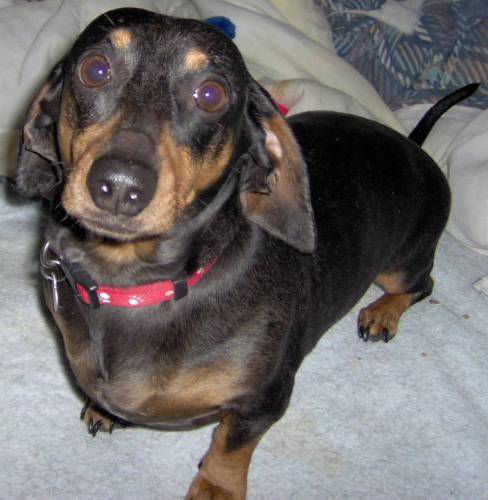

In [15]:
# example dog image
i1 = load_img(train_dir_dog + os.listdir(train_dir_dog)[1500])
i1

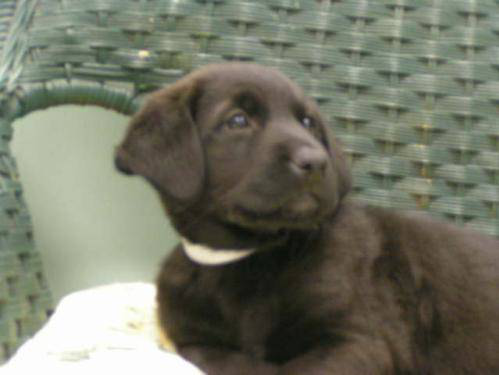

In [16]:
# example dog image
i2 = load_img(train_dir_dog + os.listdir(train_dir_dog)[1000])
i2

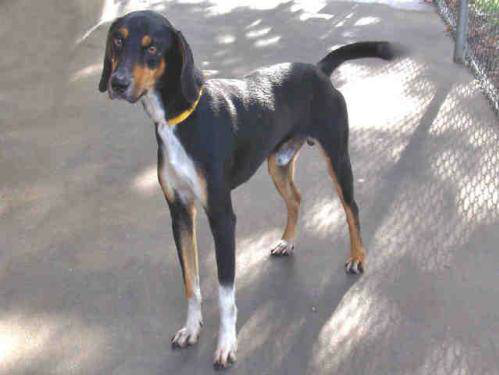

In [17]:
# example dog image
i3 = load_img(train_dir_dog + os.listdir(train_dir_dog)[10])
i3

In [18]:
# check size
print(i1.size)
print(i2.size)
print(i3.size)

(488, 500)
(499, 375)
(499, 375)


## 1.2. Plot images directly from file

In [19]:
#===============================================
# plot pictures from file
#===============================================
def PicturesFromPaths(image_paths):
    plt_pic = plt.figure(figsize = (14, 7))
    for i in range(len(image_paths)):
        sb_plt = plt_pic.add_subplot(1, len(image_paths), i + 1)
        sb_plt.axis("Off")
        plt.imshow(load_img(image_paths[i]))

In [20]:
dog_image_paths = [train_dir_dog + x for x in os.listdir(train_dir_dog)[0:5]]
dog_image_paths

['data/dogs-cats/prepared-data/train/dog/dog.7754.jpg',
 'data/dogs-cats/prepared-data/train/dog/dog.5949.jpg',
 'data/dogs-cats/prepared-data/train/dog/dog.8785.jpg',
 'data/dogs-cats/prepared-data/train/dog/dog.7828.jpg',
 'data/dogs-cats/prepared-data/train/dog/dog.3597.jpg']

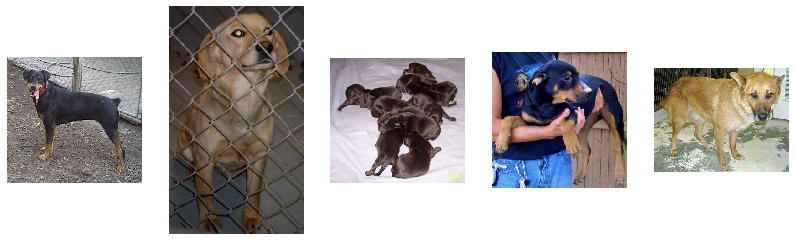

In [21]:
PicturesFromPaths(image_paths = dog_image_paths)

## 1.3. For cat lovers

In [22]:
cat_image_paths = [val_dir_cat + x for x in os.listdir(val_dir_cat)[0:5]]
cat_image_paths

['data/dogs-cats/prepared-data/val/cat/cat.10916.jpg',
 'data/dogs-cats/prepared-data/val/cat/cat.740.jpg',
 'data/dogs-cats/prepared-data/val/cat/cat.9987.jpg',
 'data/dogs-cats/prepared-data/val/cat/cat.147.jpg',
 'data/dogs-cats/prepared-data/val/cat/cat.8115.jpg']

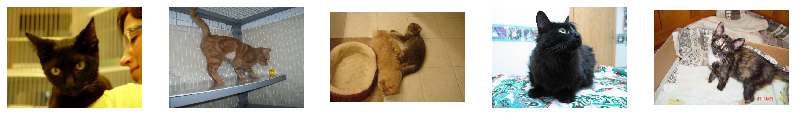

In [23]:
PicturesFromPaths(image_paths = cat_image_paths)

----

## 1.4. Under the hood

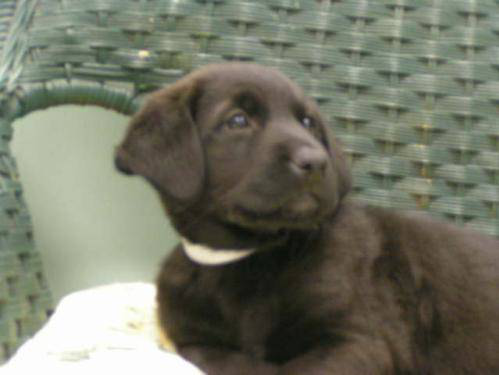

In [24]:
# sample image
i2 = load_img(train_dir_dog + os.listdir(train_dir_dog)[1000])
i2

In [25]:
# image size
i2.size

(499, 375)

In [26]:
# array size
np.array(i2).shape

(375, 499, 3)

In [27]:
# total dimensions
np.array(i2).shape[0]*np.array(i1).shape[1]

183000

In [28]:
np.array(i2)[0, :, :].shape

(499, 3)

In [29]:
np.array(i2)[:, 0, :].shape

(375, 3)

In [30]:
np.array(i2)[0, 0, :].shape

(3,)

In [31]:
np.array(i2)[:, :, 0].shape

(375, 499)

In [32]:
np.array(i2)

array([[[108, 130, 118],
        [105, 127, 114],
        [103, 126, 110],
        ...,
        [100, 124, 110],
        [ 98, 122, 108],
        [ 97, 121, 107]],

       [[110, 131, 122],
        [109, 130, 121],
        [109, 131, 119],
        ...,
        [ 95, 117, 104],
        [ 93, 115, 102],
        [ 91, 113, 100]],

       [[118, 138, 136],
        [119, 140, 135],
        [121, 142, 135],
        ...,
        [ 94, 115, 100],
        [ 91, 112,  97],
        [ 88, 109,  94]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [ 59,  53,  41],
        [ 60,  54,  42],
        [ 61,  55,  43]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [ 59,  53,  41],
        [ 60,  54,  42],
        [ 61,  55,  43]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [ 59,  53,  41],
        [ 60,  54,  42],
        [ 61,  55,  43]]

In [33]:
np.array(i2)[5:8]

array([[[129, 146, 153],
        [127, 145, 149],
        [125, 143, 147],
        ...,
        [121, 135, 118],
        [117, 131, 114],
        [112, 126, 109]],

       [[124, 142, 144],
        [122, 140, 142],
        [118, 136, 136],
        ...,
        [124, 137, 119],
        [119, 132, 114],
        [114, 127, 109]],

       [[124, 140, 137],
        [122, 138, 135],
        [119, 136, 130],
        ...,
        [126, 137, 120],
        [122, 133, 116],
        [117, 128, 111]]], dtype=uint8)

----

## 1.3. Operations on Images

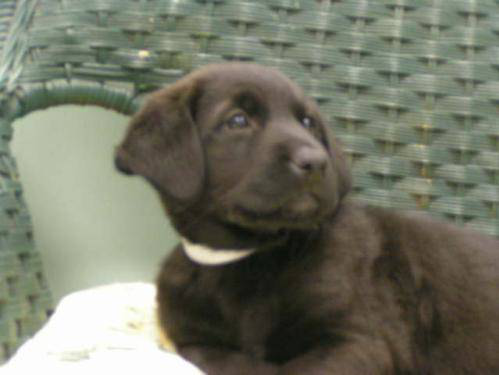

In [34]:
i2

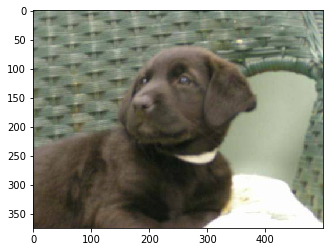

In [35]:
# mirror images
mirror = np.fliplr(i2)
plt.imshow(mirror);

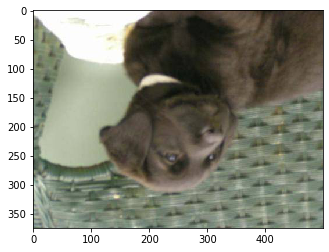

In [36]:
# vertical flip
updown = np.flipud(i2)
plt.imshow(updown);

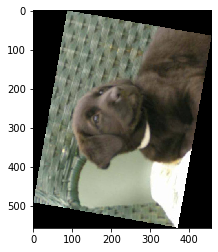

In [37]:
# rotate image by 80'
rot = rotate(i2, 80)
plt.imshow(rot);

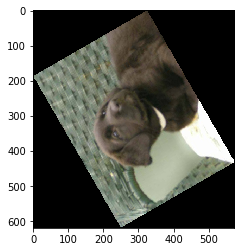

In [38]:
# rotate image by 120'
rot = rotate(i2, 120)
plt.imshow(rot);

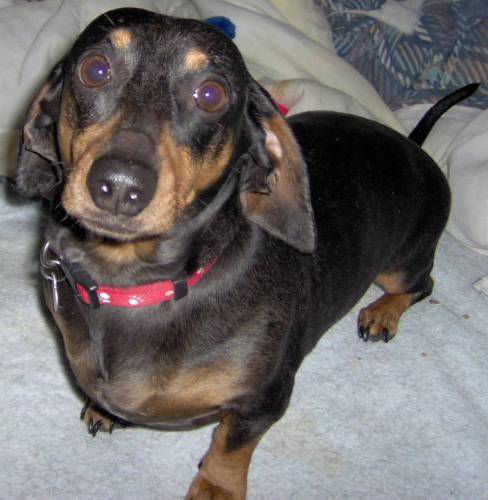

In [39]:
i1

### This Code Block Doesn't Work, Can You Figure Out Why?
Hint: Check the shapes of the images you're trying to add together.

In [45]:
# add two images
try:
    add_img = np.array(i1) + np.array(i2)
    plt.imshow(add_img);
except:
    print("Cannot add due to different dimensions.  Shapes are: %s and %s" % (np.array(i1).shape, 
                                                                              np.array(i2).shape))

Cannot add due to different dimensions.  Shapes are: (500, 488, 3) and (375, 499, 3)


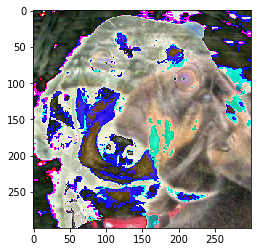

In [46]:
# add two images
add_img = np.array(i1)[0:300, 0:300, :] + np.array(i2)[0:300, 0:300, :]
plt.imshow(add_img);

----

# 2. Data preparation

## Steps to complete:
1. Read image from directory
2. Convert to array
3. Include rgb channel
4. Resize to pre-set standard 
5. Image augmentation
6. Make function to read in batches

In [47]:
# =========================================================
# pre-defined parameters
# =========================================================
image_width = 200
image_height = 200
image_size = (image_width, image_height)
batch_size = 32
num_epochs = 3

In [48]:
# =========================================================
# pre-defined parameters
# =========================================================

if K.image_data_format() == 'channels_first':
    input_shape = (3, image_width, image_height)
else:
    input_shape = (image_width, image_height, 3)

In [49]:
# =========================================================
# image batch generator
# =========================================================

train_datagen = ImageDataGenerator(rescale = 1./255) # all options disabled
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [50]:
# =========================================================
# read train in batches
# =========================================================

train_generator = train_datagen.flow_from_directory(directory = train_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    class_mode = "binary")

Found 8000 images belonging to 2 classes.


In [51]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [52]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [53]:
# =========================================================
# read val in batches
# =========================================================

val_generator = val_datagen.flow_from_directory(directory = val_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size,
                                                    shuffle = False,
                                                    class_mode = "binary")

Found 4000 images belonging to 2 classes.


In [54]:
val_generator.class_indices

{'cat': 0, 'dog': 1}

In [55]:
# =========================================================
# read test in batches
# =========================================================

test_generator = test_datagen.flow_from_directory(directory = test_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size,
                                                    shuffle = False,
                                                    class_mode = "binary")

Found 4000 images belonging to 2 classes.


In [56]:
test_generator.class_indices

{'cat': 0, 'dog': 1}

----

# 3. Simple fully connected network
With a fully connected network, we will need to flatten our image input into a one-dimensional vector.

In [58]:
# =========================================================
# define keras model
# =========================================================

fcn_1 = Sequential() # calling the sequential api
fcn_1.add(Flatten(input_shape = input_shape)) # the input layer
fcn_1.add(Dense(32)) # 32 unit hidden layer
fcn_1.add(Activation("relu")) # non-linear activation function
fcn_1.add(Dense(1)) # output layer - we only have two classes
fcn_1.add(Activation("softmax")) # compress output between 0-1

In [59]:
# =========================================================
# compile model
# =========================================================

fcn_1.compile(loss = "binary_crossentropy", # loss function - same as that for a logistic regression
              optimizer = optimizers.RMSprop(), # optimizer - RMSProp: normalizes parameter update
              metrics = ["acc"]) # store and observe model accuracy while training

In [60]:
# =========================================================
# model summary
# =========================================================

fcn_1.summary()

# we have 200 x 200 x 3 input units
# 120000 x 32 weights = 3.8 M weights -- why the extra 32?
# ReLU activation does don't have any weights

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3840032   
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 3,840,065
Trainable params: 3,840,065
Non-trainable params: 0
_________________________________________________________________


In [61]:
# =========================================================
# train model
# =========================================================

t0 = time.time()
fcn_1.fit_generator(train_generator, # call images in batches and do pre-processing 
                    epochs = 2, # number of passes over the data 
                    validation_data = val_generator, # call validation images in batches and do pre-processing
                    workers = cpus,
                    use_multiprocessing = True)
t1 = time.time()
print("-----------------")
print(f"Time taken: {t1 - t0}")

Epoch 1/2
250/250 [==============================] - 33s 133ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/2
250/250 [==============================] - 30s 121ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
-----------------
Time taken: 64.01801776885986


In [62]:
# =================================================
# predict on image batch
# =================================================

# predict on batch
pred_batch = fcn_1.predict_generator(test_generator,
                                           workers = cpus,
                                           use_multiprocessing = True,
                                           verbose = True)

len(pred_batch)

125/125 [==============================] - 8s 62ms/step


4000

In [63]:
pred_batch

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [64]:
# convert to binary label
pred_batch_label = [0 if x < 0.5 else 1 for x in list(pred_batch)]

# check accuracy
labels = [0]*len(os.listdir(test_dir_cat)) + [1]*len(os.listdir(test_dir_dog))
len(labels)

# check accuracy
accuracy_score(y_true = labels, y_pred = pred_batch_label)

0.5

----

# 4. Larger fully connected network
Let's again use a fully connected network, but add more parameters to it.  Let's see if/how this network improves our accuracy.  Remember that we're still flattening our image input into a one-dimensional vector.

In [73]:
# =========================================================
# define model
# =========================================================

fcn_1 = Sequential()
fcn_1.add(Flatten(input_shape = input_shape))
fcn_1.add(Dense(256))
fcn_1.add(Activation("relu"))
fcn_1.add(Dense(128))
fcn_1.add(Activation("relu"))
fcn_1.add(Dense(1))
fcn_1.add(Activation("softmax"))  # Use SM since this is a classification problem

# =========================================================
# compile model
# =========================================================

fcn_1.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ["acc"])

In [74]:
# =========================================================
# train model
# =========================================================

t0 = time.time()
fcn_1.fit_generator(train_generator,
                    epochs = 1,
                    validation_data = val_generator,
                    workers = cpus, 
                    use_multiprocessing = True)
t1 = time.time()

print("-----------------")
print(f"Time taken: {t1 - t0}")

Epoch 1/2
250/250 [==============================] - 139s 557ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/2
250/250 [==============================] - 137s 549ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
-----------------
Time taken: 276.9626519680023


In [75]:
# =================================================
# predict on image batch
# =================================================

# predict on batch
pred_batch = fcn_1.predict_generator(test_generator,
                                           workers = cpus,
                                           use_multiprocessing = True,
                                           verbose = True)
pred_batch

125/125 [==============================] - 16s 128ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [76]:
# convert to binary label
pred_batch_label = [0 if x < 0.5 else 1 for x in list(pred_batch)]

# check accuracy
labels = [0]*len(os.listdir(test_dir_cat)) + [1]*len(os.listdir(test_dir_dog))
len(labels)

# check accuracy
accuracy_score(y_true = labels, y_pred = pred_batch_label)

0.5

---

# 4.1. In-class Exercise - Build an even larger NN
### Run for only 1 epoch

----

# 5. Simple CNN
Now let's make a convolutional neural network!  Remember that CNNs preserve local structure and features better than fully connected layers, because we can train kernels/filters to find how pixels in an image are all related to one another.  We'll start with one convolutional layer for this CNN.

![CNN](ml_package_tutorials/notebook_diagrams/filter_learning.png)

In [65]:
# =========================================================
# define model
# =========================================================

## 1 - convolution block
cnn_1 = Sequential() # calling the sequential api
cnn_1.add(Conv2D(32, (3, 3), input_shape = input_shape)) # convolutional layer - number of filter: 32, 
                                                        # filter size : 3 x 3
                                                        # padding = None
                                                        # stride = 1
cnn_1.add(Activation("relu"))
cnn_1.add(MaxPooling2D(pool_size = (2, 2))) # pool size: 2 x 2, padding = None, stride = 1

## fully connected end
cnn_1.add(Flatten())
cnn_1.add(Dense(128))
cnn_1.add(Activation("relu"))
cnn_1.add(Dense(1))
cnn_1.add(Activation('sigmoid'))

In [66]:
# =========================================================
# compile model
# =========================================================

cnn_1.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ["acc"])

In [67]:
# =========================================================
# model summary
# =========================================================

# check output size
# output = (W - F + 2P)/ S + 1
print(f"Output size of 1st convolution: {(input_shape[0] - 3 + 2*0)/1 + 1}")
print("\n-------\n")

# model summary
print(cnn_1.summary())

Output size of 1st convolution: 198.0

-------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 313632)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               40145024  
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)             

In [68]:
# =========================================================
# train model
# =========================================================

t0 = time.time()
cnn_1.fit_generator(train_generator,
                    epochs = 1,
                    validation_data = val_generator,
                    workers = cpus, 
                    use_multiprocessing = True)
t1 = time.time()

print("-----------------")
print(f"Time taken: {t1 - t0}")

Epoch 1/1
249/250 [============================>.] - ETA: 1s - loss: 8.0142 - acc: 0.5013Epoch 1/1
Epoch 1/1
250/250 [==============================] - 401s 2s/step - loss: 8.0104 - acc: 0.5015 - val_loss: 8.0590 - val_acc: 0.5000
-----------------
Time taken: 402.2277476787567


In [ ]:
# =================================================
# predict on image batch
# =================================================

# predict on batch
pred_batch = cnn_1.predict_generator(test_generator,
                                           workers = cpus,
                                           use_multiprocessing = True,
                                           verbose = True)
pred_batch

125/125 [==============================] - 60s 482ms/step


In [82]:
# convert to binary label
pred_batch_label = [0 if x < 0.5 else 1 for x in list(pred_batch)]

# check accuracy
labels = [0]*len(os.listdir(test_dir_cat)) + [1]*len(os.listdir(test_dir_dog))
len(labels)

# check accuracy
accuracy_score(y_true = labels, y_pred = pred_batch_label)

0.5

Can you think of why we get the accuracy rate that we observed above?  Do you think the fact that we only have one convolutional layer impact our ability to learn useful features?

----

# 6. Deeper CNN
In the example above, we only used one convolution layer, which affected our ability to learn useful features.  Generally, the more convolutional layers you have, the more finer details/visual features the network can learn.  The features learned through the network go from more general (closer to the input of the network) to less general (closer to the output of the network).  Let's try adding more of these convolutional layers.

Visualizing CNN filters is quite useful for intuitively and qualitatively evaluating the quality of your network.  With proper training, you may be even able to visualize CNN filters such as the ones below.

![CNN Filters](ml_package_tutorials/notebook_diagrams/filters_cats.png)

In [83]:
# =========================================================
# define model
# =========================================================

## 1 - convolution block
cnn_1 = Sequential()
cnn_1.add(Conv2D(32, (3, 3), input_shape = input_shape))
cnn_1.add(Activation("relu"))
cnn_1.add(MaxPooling2D(pool_size = (2, 2)))

## 2 - convolution block
cnn_1.add(Conv2D(32, (3, 3)))
cnn_1.add(Activation("relu"))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))

## 3 - convolution block
cnn_1.add(Conv2D(32, (3, 3)))
cnn_1.add(Activation("relu"))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))

## fully connected end
cnn_1.add(Flatten())
cnn_1.add(Dense(128))
cnn_1.add(Activation("relu"))
cnn_1.add(Dense(1))
cnn_1.add(Activation("sigmoid"))

# =========================================================
# compile model
# =========================================================

cnn_1.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ["acc"])

In [84]:
# =========================================================
# train model
# =========================================================

t0 = time.time()
cnn_1.fit_generator(train_generator,
                    epochs = num_epochs,
                    validation_data = val_generator,
                    workers = cpus, 
                    use_multiprocessing = True)
t1 = time.time()

print("-----------------")
print(f"Time taken: {t1 - t0}")

Epoch 1/3
250/250 [==============================] - 459s 2s/step - loss: 0.6679 - acc: 0.6065 - val_loss: 0.5846 - val_acc: 0.6803
Epoch 2/3
250/250 [==============================] - 461s 2s/step - loss: 0.5570 - acc: 0.7131 - val_loss: 0.6111 - val_acc: 0.6815
Epoch 3/3
250/250 [==============================] - 461s 2s/step - loss: 0.4950 - acc: 0.7580 - val_loss: 0.5244 - val_acc: 0.7445
-----------------
Time taken: 1380.8606781959534


In [85]:
# =================================================
# predict on image batch
# =================================================

# predict on batch
pred_batch = cnn_1.predict_generator(test_generator,
                                           workers = cpus,
                                           use_multiprocessing = True,
                                           verbose = True)
pred_batch

125/125 [==============================] - 79s 632ms/step


array([[0.23287132],
       [0.07135677],
       [0.10632172],
       ...,
       [0.6016439 ],
       [0.9468658 ],
       [0.9479916 ]], dtype=float32)

In [86]:
# convert to binary label
pred_batch_label = [0 if x < 0.5 else 1 for x in list(pred_batch)]

# check accuracy
labels = [0]*len(os.listdir(test_dir_cat)) + [1]*len(os.listdir(test_dir_dog))
len(labels)

# check accuracy
accuracy_score(y_true = labels, y_pred = pred_batch_label)

0.7535

----

# 7. Deeper CNN with Dropout
**Dropout** is a technique we can use to make our network more robust and generalizable to data we haven't seen.  It reduces the dependence of individual weights in the network on other weights.

Dropout works by randomly setting different weights in the network to zero on each training step.  Specifically, each weight is set to 0 (independently of all other weights) with probability p.

![Dropout](ml_package_tutorials/notebook_diagrams/dropout.png)

In [21]:
# =========================================================
# define model
# =========================================================

## 1 - convolution block
cnn_1 = Sequential()
cnn_1.add(Conv2D(32, (3, 3), input_shape = input_shape))
cnn_1.add(Activation("relu"))
cnn_1.add(MaxPooling2D(pool_size = (2, 2)))

## 2 - convolution block
cnn_1.add(Conv2D(32, (3, 3)))
cnn_1.add(Activation("relu"))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))

## 3 - convolution block
cnn_1.add(Conv2D(32, (3, 3)))
cnn_1.add(Activation("relu"))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))

## fully connected end
cnn_1.add(Flatten())
cnn_1.add(Dense(128))
cnn_1.add(Activation("relu"))
cnn_1.add(Dropout(0.25))
cnn_1.add(Dense(1))
cnn_1.add(Activation("sigmoid"))

# =========================================================
# compile model
# =========================================================

cnn_1.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ["acc"])

In [22]:
# =========================================================
# train model
# =========================================================

t0 = time.time()
cnn_1.fit_generator(train_generator,
                    epochs = 3,
                    validation_data = val_generator,
                    workers = cpus, 
                    use_multiprocessing = True)
t1 = time.time()

print("-----------------")
print(f"Time taken: {t1 - t0}")

Epoch 1/3
250/250 [==============================] - 414s 2s/step - loss: 0.6920 - acc: 0.5988 - val_loss: 0.5836 - val_acc: 0.6837
Epoch 2/3
250/250 [==============================] - 415s 2s/step - loss: 0.5717 - acc: 0.7051 - val_loss: 0.5316 - val_acc: 0.7430
Epoch 3/3
250/250 [==============================] - 414s 2s/step - loss: 0.4962 - acc: 0.7604 - val_loss: 0.5176 - val_acc: 0.7460
-----------------
Time taken: 1243.5146610736847


In [23]:
# =================================================
# predict on image batch
# =================================================

# predict on batch
pred_batch = cnn_1.predict_generator(test_generator,
                                           workers = cpus,
                                           use_multiprocessing = True,
                                           verbose = True)
pred_batch

125/125 [==============================] - 72s 579ms/step


array([[0.3749922 ],
       [0.35111144],
       [0.51764125],
       ...,
       [0.9342358 ],
       [0.9402952 ],
       [0.9543447 ]], dtype=float32)

In [24]:
# convert to binary label
pred_batch_label = [0 if x < 0.5 else 1 for x in list(pred_batch)]

# check accuracy
labels = [0]*len(os.listdir(test_dir_cat)) + [1]*len(os.listdir(test_dir_dog))
len(labels)

# check accuracy
accuracy_score(y_true = labels, y_pred = pred_batch_label)

0.76425

### clean up memory
This command is used if we no longer need neural networks that we've stored in memory.

In [26]:
del fcn_1, cnn_1

----

# 8. Data Augmentation
Data augmentation is a technique we can use to build more robust and generalizable neural networks.  Some data augmentation techniques we'll use:

1. Image rotation

2. Image flipping

3. Image Random Cropping

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 15,
                                   width_shift_range = .15,
                                   height_shift_range = .15,
                                   horizontal_flip = True)

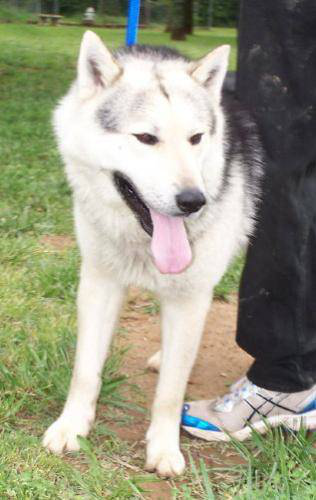

In [28]:
# original image
i0 = load_img(train_dir_dog + os.listdir(train_dir_dog)[20])
i0

In [29]:
# convert to numpy array
x = img_to_array(i0) 
x = x.reshape((1,) + x.shape) 

In [30]:
# directory to store results
preview_dir = data_dir + "preview/"
print(preview_dir)

if not os.path.exists(preview_dir):
    os.makedirs(preview_dir)

data/dogs-cats/prepared-data/preview/


In [31]:
i = 0
for batch in train_datagen.flow(x, batch_size = 1, 
                          save_to_dir = preview_dir, 
                          save_prefix = "dog", 
                          save_format = "jpeg"):
    i += 1
    if i > 5:
        break

In [32]:
# saved files
os.listdir(preview_dir)

['dog_0_300.jpeg',
 'dog_0_1349.jpeg',
 'dog_0_3714.jpeg',
 'dog_0_2276.jpeg',
 'dog_0_1972.jpeg',
 'dog_0_5885.jpeg',
 'dog_0_9937.jpeg',
 'dog_0_6427.jpeg',
 'dog_0_3261.jpeg',
 'dog_0_7758.jpeg',
 'dog_0_7757.jpeg',
 'dog_0_9681.jpeg',
 'dog_0_342.jpeg',
 'dog_0_5804.jpeg',
 'dog_0_5362.jpeg',
 'dog_0_9779.jpeg',
 'dog_0_2127.jpeg',
 'dog_0_2813.jpeg']

In [33]:
# image paths
preview_images = [preview_dir + x for x in os.listdir(preview_dir)]
print(preview_images)

['data/dogs-cats/prepared-data/preview/dog_0_300.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_1349.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_3714.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_2276.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_1972.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_5885.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_9937.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_6427.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_3261.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_7758.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_7757.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_9681.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_342.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_5804.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_5362.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_9779.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_2127.jpeg', 'data/dogs-cats/prepared-data/preview/dog_0_2813.

##### Show our Augmented Dataset

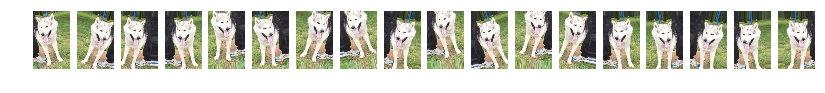

In [37]:
PicturesFromPaths(image_paths = preview_images)

----

# 9. CNN with Data Augmentation and Dropout
Let's use these **regularization** techniques to make our network more robust and generalizable when making future predictions on unseen data.

In [38]:
# =================================================
# data augmentation
# =================================================

# re-define image data generator to include transformations
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = "nearest")

# test generator remains the same
test_datagen = ImageDataGenerator(rescale = 1./255)

# training data generator
train_generator = train_datagen.flow_from_directory(directory = train_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    class_mode = "binary")

# validation data generator
val_generator = test_datagen.flow_from_directory(directory = val_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size,
                                                    shuffle = False,
                                                    class_mode = "binary")

# test data generator
test_generator = test_datagen.flow_from_directory(directory = test_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size,
                                                    shuffle = False,
                                                    class_mode = "binary")

Found 8000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [39]:
# =========================================================
# define model
# =========================================================

## 1 - convolution block
cnn_2 = Sequential()
cnn_2.add(Conv2D(32, (3, 3), input_shape = input_shape))
cnn_2.add(Activation("relu"))
cnn_2.add(MaxPooling2D(pool_size = (2, 2)))

## 2 - convolution block
cnn_2.add(Conv2D(32, (3, 3)))
cnn_2.add(Activation("relu"))
cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_2.add(Dropout(0.25))

## 3 - convolution block
cnn_2.add(Conv2D(32, (3, 3)))
cnn_2.add(Activation("relu"))
cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_2.add(Dropout(0.25))

## 4 - convolution block
cnn_2.add(Conv2D(32, (3, 3)))
cnn_2.add(Activation("relu"))
cnn_2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_2.add(Dropout(0.25))

## fully connected end
cnn_2.add(Flatten())
cnn_2.add(Dense(128))
cnn_2.add(Activation("relu"))
cnn_2.add(Dropout(0.5))
cnn_2.add(Dense(1))
cnn_2.add(Activation('sigmoid'))

# =========================================================
# compile model
# =========================================================

cnn_2.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ["acc"])

In [40]:
# =========================================================
# train model
# =========================================================

t0 = time.time()
cnn_2.fit_generator(train_generator,
                    epochs = 5,
                    validation_data = val_generator,
                    workers = cpus, 
                    use_multiprocessing = True)
t1 = time.time()

print("-----------------")
print(f"Time taken: {t1 - t0}")

Epoch 1/5
250/250 [==============================] - 445s 2s/step - loss: 0.6811 - acc: 0.5666 - val_loss: 0.6722 - val_acc: 0.5763
Epoch 2/5
250/250 [==============================] - 441s 2s/step - loss: 0.6115 - acc: 0.6606 - val_loss: 0.5599 - val_acc: 0.7133
Epoch 3/5
250/250 [==============================] - 442s 2s/step - loss: 0.5793 - acc: 0.6994 - val_loss: 0.5310 - val_acc: 0.7408
Epoch 4/5
250/250 [==============================] - 443s 2s/step - loss: 0.5527 - acc: 0.7231 - val_loss: 0.5403 - val_acc: 0.7400
Epoch 5/5
250/250 [==============================] - 441s 2s/step - loss: 0.5389 - acc: 0.7329 - val_loss: 0.5049 - val_acc: 0.7518
-----------------
Time taken: 2213.0291407108307


In [41]:
# =================================================
# predict on image batch
# =================================================

# predict on batch
pred_batch = cnn_2.predict_generator(test_generator,
                                           workers = cpus,
                                           use_multiprocessing = True,
                                           verbose = True)

# convert to binary label
pred_batch_label = [0 if x < 0.5 else 1 for x in list(pred_batch)]

# check accuracy
labels = [0]*len(os.listdir(test_dir_cat)) + [1]*len(os.listdir(test_dir_dog))
accuracy_score(y_true = labels, y_pred = pred_batch_label)

125/125 [==============================] - 74s 590ms/step


0.75225

## 9.1. Re-compile and run with smaller learning rate and larger batch size

In [42]:
# =========================================================
# re-compile model and re-run
# =========================================================

# training data generator
train_generator = train_datagen.flow_from_directory(directory = train_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size*2,
                                                    shuffle = True,
                                                    class_mode = "binary")

# recompile
cnn_2.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(lr = 0.0001),
              metrics = ["acc"])

# fit
cnn_2.fit_generator(train_generator,
                    epochs = 2,
                    validation_data = val_generator,
                    workers = cpus, 
                    use_multiprocessing = True)

Found 8000 images belonging to 2 classes.
Epoch 1/2
125/125 [==============================] - 441s 4s/step - loss: 0.4663 - acc: 0.7804 - val_loss: 0.4605 - val_acc: 0.7935
Epoch 2/2
125/125 [==============================] - 437s 3s/step - loss: 0.4564 - acc: 0.7876 - val_loss: 0.4573 - val_acc: 0.7980


In [43]:
# =================================================
# predict on image batch
# =================================================

# predict on batch
pred_batch = cnn_2.predict_generator(test_generator,
                                           workers = cpus,
                                           use_multiprocessing = True,
                                           verbose = True)

# convert to binary label
pred_batch_label = [0 if x < 0.5 else 1 for x in list(pred_batch)]

# check accuracy
labels = [0]*len(os.listdir(test_dir_cat)) + [1]*len(os.listdir(test_dir_dog))
accuracy_score(y_true = labels, y_pred = pred_batch_label)

125/125 [==============================] - 74s 592ms/step


0.79825

## 9.2. Re-compile and run with even smaller learning rate

In [44]:
# =========================================================
# re-compile model and re-run
# =========================================================


# training data generator
train_generator = train_datagen.flow_from_directory(directory = train_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size*4,
                                                    shuffle = True,
                                                    class_mode = "binary")

# recompile
cnn_2.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(lr = 0.00001),
              metrics = ["acc"])

# fit
cnn_2.fit_generator(train_generator,
                    epochs = 1,
                    validation_data = val_generator,
                    workers = cpus, 
                    use_multiprocessing = True)

Found 8000 images belonging to 2 classes.
Epoch 1/1
63/63 [==============================] - 453s 7s/step - loss: 0.4519 - acc: 0.7889 - val_loss: 0.4568 - val_acc: 0.7987


In [45]:
# =================================================
# predict on image batch
# =================================================

# predict on batch
pred_batch = cnn_2.predict_generator(test_generator,
                                           workers = cpus,
                                           use_multiprocessing = True,
                                           verbose = True)

# convert to binary label
pred_batch_label = [0 if x < 0.5 else 1 for x in list(pred_batch)]

# check accuracy
labels = [0]*len(os.listdir(test_dir_cat)) + [1]*len(os.listdir(test_dir_dog))
accuracy_score(y_true = labels, y_pred = pred_batch_label)

125/125 [==============================] - 73s 587ms/step


0.79825

### clean up memory

In [74]:
#del cnn_2

----

# 10. Transfer learning with ResNet
Here, we will use a pre-trained network for our image classification task.  A common technique used in transfer learning is to take a network that has been **pre-trained** on a large, general dataset such as ImageNet, and then **fine-tune** this pre-trained network by training it on our specific, narrower dataset.  

In [46]:
# =========================================================
# data augmentation data generator
# =========================================================

# re-define image data generator to include transformations
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = "nearest")

# test generator remains the same
test_datagen = ImageDataGenerator()

# training data generator
train_generator = train_datagen.flow_from_directory(directory = train_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    class_mode = "binary")

# validation data generator
val_generator = test_datagen.flow_from_directory(directory = val_dir, 
                                                    target_size = image_size, 
                                                    batch_size = batch_size,
                                                    shuffle = False,
                                                    class_mode = "binary")

Found 8000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [76]:
# =========================================================
# Download resnet weights
# =========================================================

#resnet_base = ResNet50(weights = "imagenet", include_top = False)

In [77]:
# =========================================================
# Save model
# =========================================================

'''
# model to JSON file format
model_json = resnet_base.to_json()
with open("data/dogs-cats/resnet_base.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
resnet_base.save_weights("data/dogs-cats/resnet_base.h5")
print("resnet to disk")
'''


'\n# model to JSON file format\nmodel_json = resnet_base.to_json()\nwith open("data/dogs-cats/resnet_base.json", "w") as json_file:\n    json_file.write(model_json)\n\n# serialize weights to HDF5\nresnet_base.save_weights("data/dogs-cats/resnet_base.h5")\nprint("resnet to disk")\n'

In [53]:
# =========================================================
# load resnet base from disk
# =========================================================

# load json and create model
json_file = open("data/dogs-cats/resnet_base.json", "r")
resnet_from_json = json_file.read()
json_file.close()

resnet_base = model_from_json(resnet_from_json)

# load weights into new model
resnet_base.load_weights("data/dogs-cats/resnet_base.h5")
print("resnet loaded")

resnet loaded


In [54]:
# =================================================
# add top layers to base model
# =================================================

resnet_top = resnet_base.output
resnet_top = GlobalAveragePooling2D()(resnet_top)
#resnet_top = Dense(256, activation = "relu")(resnet_top) - alternative way
resnet_pred = Dense(1, activation = "sigmoid")(resnet_top)

In [55]:
# =================================================
# create full model
# =================================================
resnet_full = Model(inputs = resnet_base.input, outputs = resnet_pred)

In [56]:
# =================================================
# freeze earlier layers to not train them
# =================================================
for layer in resnet_base.layers:
    layer.trainable = False

In [57]:
# =================================================
# compile model
# =================================================
resnet_full.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ["acc"])

In [58]:
# =================================================
# train model
# =================================================
t0 = time.time()
resnet_full.fit_generator(train_generator,
                    epochs = 1,
                    validation_data = val_generator,
                    workers = cpus, 
                    use_multiprocessing = True)
t1 = time.time()
print(t1 - t0)

Epoch 1/1
250/250 [==============================] - 2927s 12s/step - loss: 0.1659 - acc: 0.9391 - val_loss: 0.2335 - val_acc: 0.9087
2927.496312856674


---

# 11. Predict on test dataset

## 11.1. Predict on a batch of images

In [61]:
# =================================================
# predict on image batch
# =================================================

# test generator remains the same
test_datagen = ImageDataGenerator()

# test data generator
test_generator = test_datagen.flow_from_directory(directory = test_dir, 
                                                  target_size = image_size, 
                                                  batch_size = 100,
                                                  shuffle = False,
                                                  class_mode = "binary")

Found 4000 images belonging to 2 classes.


In [62]:
print(len(test_generator))

40


In [63]:
# predict on batch
pred_resnet = resnet_full.predict_generator(test_generator,
                                           workers = cpus,
                                           use_multiprocessing = True,
                                           verbose = True)
len(pred_resnet)

40/40 [==============================] - 1064s 27s/step


In [64]:
pred_resnet

array([[4.5392157e-05],
       [2.9874127e-06],
       [3.0529830e-03],
       ...,
       [9.9939454e-01],
       [4.0445281e-03],
       [9.8336732e-01]], dtype=float32)

In [65]:
# convert to binary label
pred_resnet_label = [0 if x < 0.5 else 1 for x in list(pred_resnet)]

In [66]:
# check accuracy
labels = [0]*len(os.listdir(test_dir_cat)) + [1]*len(os.listdir(test_dir_dog))
len(labels)

4000

In [67]:
# check accuracy
accuracy_score(y_true = labels, y_pred = pred_resnet_label)

0.90525

## 11.2. Inspect incorrect classifications

In [85]:
# labels which are incorrect
incorret_pred = [x - y for x, y in zip(labels, pred_resnet_label)]

In [86]:
pd.Series(incorret_pred).value_counts()

 0    3621
 1     372
-1       7
dtype: int64

In [87]:
# incorrect cats
incorret_cats = np.where(np.array(incorret_pred) == -1)[0]
incorret_cats

array([ 120,  247,  664,  933, 1009, 1189, 1987])

In [88]:
# get paths for these images
incorrect_cat_paths = [test_dir_cat + os.listdir(test_dir_cat)[i] for i in list(incorret_cats)]
incorrect_cat_paths

['data/dogs-cats/prepared-data/test/cat/cat.6716.jpg',
 'data/dogs-cats/prepared-data/test/cat/cat.467.jpg',
 'data/dogs-cats/prepared-data/test/cat/cat.1090.jpg',
 'data/dogs-cats/prepared-data/test/cat/cat.11950.jpg',
 'data/dogs-cats/prepared-data/test/cat/cat.1886.jpg',
 'data/dogs-cats/prepared-data/test/cat/cat.3712.jpg',
 'data/dogs-cats/prepared-data/test/cat/cat.11387.jpg']

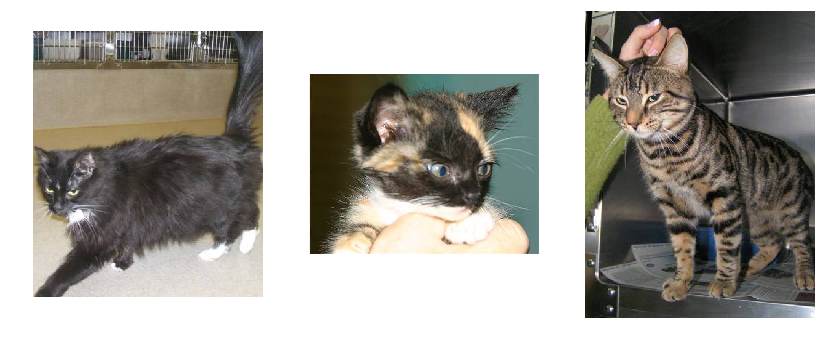

In [89]:
PicturesFromPaths(image_paths = incorrect_cat_paths[4:7])

## What about incorrect dogs?

In [ ]:
# ======================================
# Write code to identify incorrect dogs
# ======================================

----

## 11.3. Predict on a single image

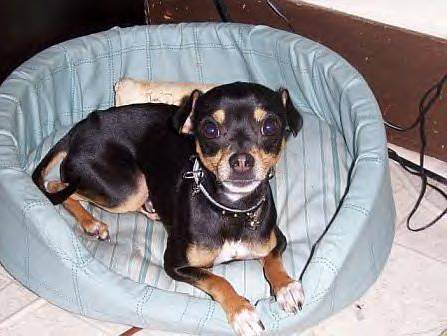

In [73]:
test_image = load_img(test_dir_dog + os.listdir(test_dir_dog)[100])
test_image

In [74]:
# image size
test_image.size

(447, 336)

In [75]:
# input with correct image size
test_image = load_img(test_dir_dog + os.listdir(test_dir_dog)[100], target_size = (image_width, image_height))
test_image.size

(200, 200)

In [76]:
# add dimension to make tensor
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 200, 200, 3)

In [77]:
# predict using keras
resnet_full.predict(test_image)[0][0]

0.97194225

-----

# 12. In-class Exercise

1. Build a different deep neural network to classify cats and dogs
2. Feel free to modify any of the architectures used above or create something from scratch
3. Possible things to try:
    1. Deeper CNN
    2. CNN with different filter sizes
    3. Change Max-pool to Avgerage-Pool
    4. RESNET with smaller learning rate
4. Report your result on the test dataset
5. We have 20-minutes for this exercise - includes coding time, training time, and testing time
    

## Example: Re-compile with smaller learning rate

In [84]:
# =================================================
# re-compile with smaller learning rate model
# =================================================

new_learning_rate

resnet_full.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ["acc"])

In [ ]:
# =================================================
# train model
# =================================================
t0 = time.time()
resnet_full.fit_generator(train_generator,
                    epochs = 1,
                    validation_data = val_generator,
                    workers = cpus, 
                    use_multiprocessing = True)
t1 = time.time()
print(t1 - t0)

In [ ]:
# =================================================
# Write code to predict on test
# =================================================

-----